<a href="https://colab.research.google.com/github/FairozAhmadSheikh/Tensor_Flow/blob/main/02_Neural_Network_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.19.0


In [3]:
# Creating features
X=tf.constant([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

In [4]:
# Create Labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

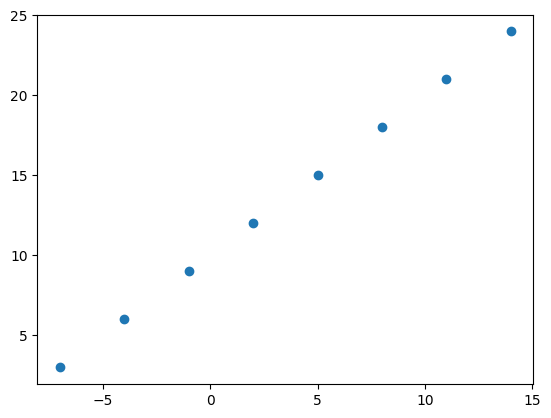

In [5]:
# Visulize it
plt.scatter(X,y)


# **Create a  demo tensor for our housing price prediction problem**

In [6]:
house_info=tf.constant(['bedroom','bathroom','garaage'])
house_price=tf.constant([971325])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garaage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([971325], dtype=int32)>)

In [7]:
input_shape=X.shape
output_shape=y.shape

input_shape,output_shape

(TensorShape([8]), (8,))

In [8]:
input_shape=X[0].shape
output_shape=y[0].shape

input_shape,output_shape

(TensorShape([]), ())

In [9]:
X[0].ndim

0

In [10]:
X[0],y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>, np.float64(3.0))

# **Neural Net Building**

In [11]:
tf.random.set_seed(42)

# create a model
model =tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile Model
model.compile(loss=tf.keras.losses.MAE,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
# fit the model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.9129 - mae: 7.9129
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - loss: 7.7804 - mae: 7.7804
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 7.6479 - mae: 7.6479
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - loss: 7.5154 - mae: 7.5154
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - loss: 7.4700 - mae: 7.4700


In [12]:
y_pred=model.predict(tf.constant([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


array([[29.564968]], dtype=float32)

# **Improve models perfromance**
HyperParameter Tuning


In [13]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=101)

Epoch 1/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 14.1950 - mae: 14.1950
Epoch 2/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 13.3537 - mae: 13.3537
Epoch 3/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 12.5865 - mae: 12.5865
Epoch 4/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - loss: 11.8470 - mae: 11.8470
Epoch 5/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 11.0885 - mae: 11.0885
Epoch 6/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 10.2836 - mae: 10.2836
Epoch 7/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 9.4236 - mae: 9.4236
Epoch 8/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - loss: 8.4334 - mae: 8.4334
Epoch 9/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 7.2949 - mae: 7.2949
Epoch 10/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 6.0104 - mae: 6.0104
Epoch 11/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 4.5313 - mae: 4.5313
Epoch 12/101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 4.0363 - mae: 4.0363
Epoch 13/101
1/1 ━━━━━━━━━━━━━━━

In [14]:
y_pred=model.predict(tf.constant([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


array([[30.490519]], dtype=float32)

In [15]:
# again hyperparamter tuning

model=tf.keras.Sequential([
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1),
])

model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=['mse'])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=90)

Epoch 1/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 221.0751 - mse: 221.0751
Epoch 2/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 193.3640 - mse: 193.3640
Epoch 3/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 156.1519 - mse: 156.1519
Epoch 4/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 109.0281 - mse: 109.0281
Epoch 5/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 58.9632 - mse: 58.9632
Epoch 6/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 24.3196 - mse: 24.3196
Epoch 7/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 37.3746 - mse: 37.3746
Epoch 8/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 68.8613 - mse: 68.8613
Epoch 9/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 59.4819 - mse: 59.4819
Epoch 10/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 35.2986 - mse: 35.2986
Epoch 11/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 19.9341 - mse: 19.9341
Epoch 12/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 17.8578 - mse: 17.8578
Epoch 13/90
1/1 ━━━━━━━━━━━━━━

In [16]:
y_pred=model.predict(tf.constant([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


array([[26.816616]], dtype=float32)

# **Making Dataset Bigger**

In [17]:
X=tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [18]:
y=X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

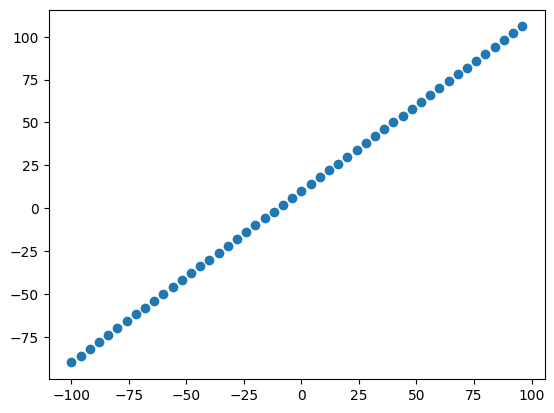

In [19]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

# **Train Test Split**
* Three Sets
> Training , Validation and Test Set

In [20]:
# Split data into train and test set
len(X)

50

In [21]:
X_train=X[:40]   # 80% for training purpose
y_train=y[:40]

X_test=X[40:]   # 20 % for testing
y_test=y[40:]


# **Visualize the Data**

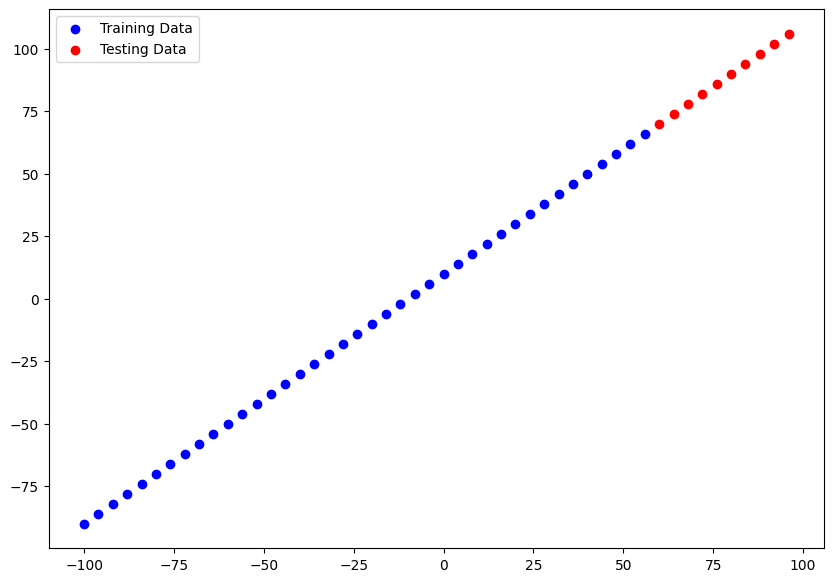

In [22]:
plt.figure(figsize=(10,7))

# plot training data
plt.scatter(X_train,y_train,c='b',label='Training Data')

# plot test data
plt.scatter(X_test,y_test,c='r',label='Testing Data')

plt.legend();

In [24]:
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

model.compile(loss=tf.keras.losses.MAE,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.fit(X_train,y_train,epochs=100,verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 18.3076 - mae: 18.3076 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.7788 - mae: 11.7788
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.9973 - mae: 7.9973
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 9.6273 - mae: 9.6273
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.9794 - mae: 7.9794
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.6156 - mae: 9.6156
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.9616 - mae: 7.9616
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 9.6040 - mae: 9.6040
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 7.9437 - mae: 7.9437
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.5924 - mae: 9.5924
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.9259 - mae: 7.9259
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 9.5808 - mae: 9.5808
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24m